# ADA_BOOSTING (ENSEMBLE LEARNING)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("C:\\Users\\spoor\\Downloads\\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values # Age, EstimatedSalary
y = dataset. iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ADA BOOSTING

In [5]:
base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42)
classifier.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [6]:
y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8875


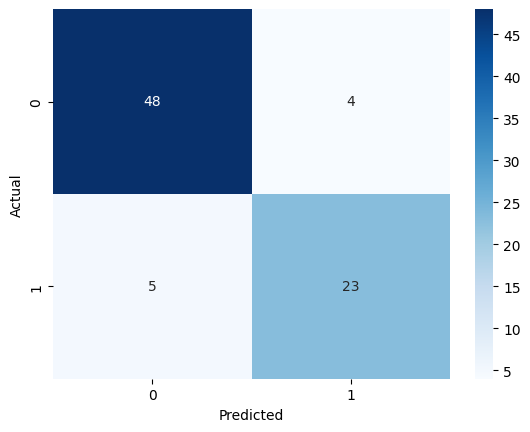

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# GRADIENT BOOSTING

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
n_estimators=100,
learning_rate=0.1,
max_depth=3,
random_state=42

)

gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [9]:
y_pred_gb = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.8625


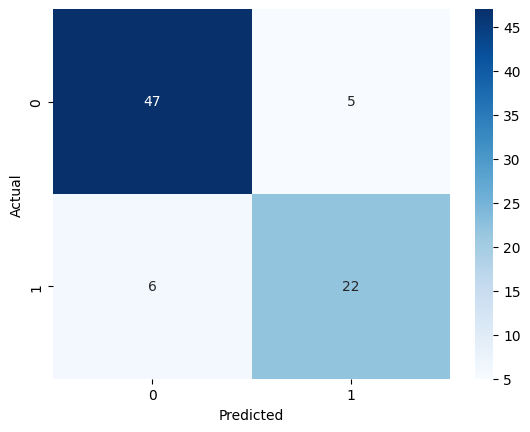

In [10]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XG BOOST CLASSIFIER

In [11]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)


C:\Users\spoor\anaconda3\envs\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:55:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [13]:
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.9125


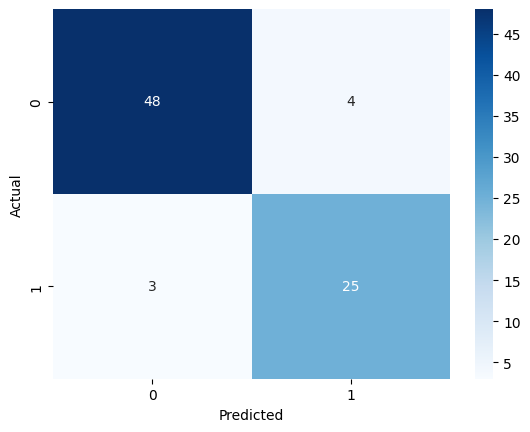

In [14]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# customer churn dataset
Build an ensemble model that improves predictions iteratively.  
Train the model using historical customer data.  
Observe how the model:  
Focuses more on previously misclassified customers  
Learns complex patterns gradually  
Evaluate the model using:  
Accuracy  
Precision  
Recall  
F1-Score  
Compare the results with the baseline model.  

In [16]:
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [19]:
df = pd.get_dummies(df, drop_first=True)


In [20]:
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
y1 = df['Churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X1_train, y1_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

y1_pred_dt = dt.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred_dt))
print("Recall (Churn):", recall_score(y1_test, y1_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_dt))


Accuracy: 0.794180269694819
Recall (Churn): 0.5401069518716578
Confusion Matrix:
 [[917 118]
 [172 202]]


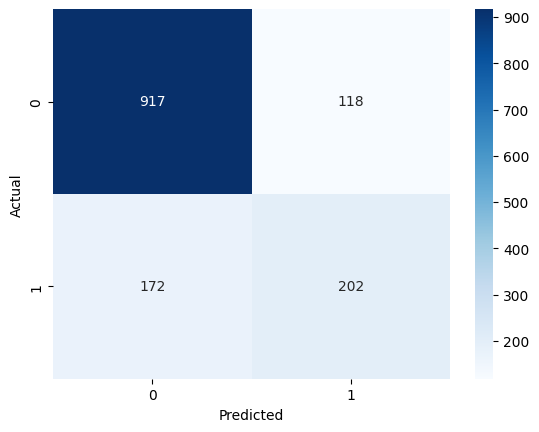

In [24]:
cm_dt = confusion_matrix(y1_test, y1_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
xgb_c = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)


In [27]:
xgb_c.fit(X1_train, y1_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [29]:
y1_pred_c = xgb_c.predict(X1_test)


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y1_test, y1_pred_c))
print("Precision:", precision_score(y1_test,y1_pred_c))
print("Recall:", recall_score(y1_test, y1_pred_c))
print("F1 Score:", f1_score(y1_test, y1_pred_c))

print("\nConfusion Matrix:")
print(confusion_matrix(y1_test, y1_pred_c))


Accuracy: 0.794889992902768
Precision: 0.639344262295082
Recall: 0.5213903743315508
F1 Score: 0.5743740795287187

Confusion Matrix:
[[925 110]
 [179 195]]


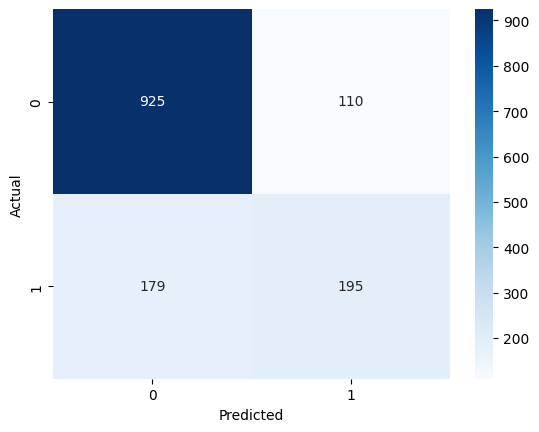

In [32]:
cm_c = confusion_matrix(y1_test, y1_pred_c)
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()